In [30]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

### ex. 0: Simulate phone dataset

part A

In [9]:
np.random.seed(42)
minutes_month = np.random.normal(loc = 100, scale = 100, size = 400)
minutes_month = [np.abs(i) for i in minutes_month]
#noise_values = np.random.normal(loc = 0, scale = 50, size = 400)

cost_function = lambda x: 2*x + 25 + np.random.normal(loc = 0, scale = 50)

cost_per_month = [cost_function(x) for x in minutes_month]
cost_per_month

[244.62144766252817,
 167.37838861807444,
 354.7998926060476,
 531.9550009698422,
 155.66605148137063,
 209.31510522753882,
 487.46154163234854,
 371.3679715795171,
 137.11990439860452,
 359.2339504201304,
 167.89720534195203,
 75.62194469405517,
 196.6867457764257,
 271.539890026485,
 186.59926710158612,
 75.11816732397777,
 105.1238228430109,
 293.6331982336977,
 102.36004409894913,
 110.83666433756372,
 621.1671500284102,
 267.6117820248531,
 226.05743351363108,
 158.52818479040914,
 148.39225257422086,
 315.6160958185907,
 6.952542455455344,
 334.4421766690563,
 157.79348635871838,
 78.72427572018894,
 45.495751920831864,
 493.49402801378255,
 208.83021333018533,
 72.41929858097818,
 464.6268350254392,
 72.87346901519321,
 348.20349627951566,
 147.92895186521054,
 5.468087811928356,
 261.59486222899375,
 391.8965884460474,
 257.63891883328944,
 98.49823852035807,
 160.32325890650282,
 55.48092304824283,
 114.51478576256021,
 151.20215811288492,
 389.4304559274153,
 268.030312046857

* Установка "seed" в 42 означает установку начального значения (seed) для генератора случайных чисел равным 42. 

<Axes: >

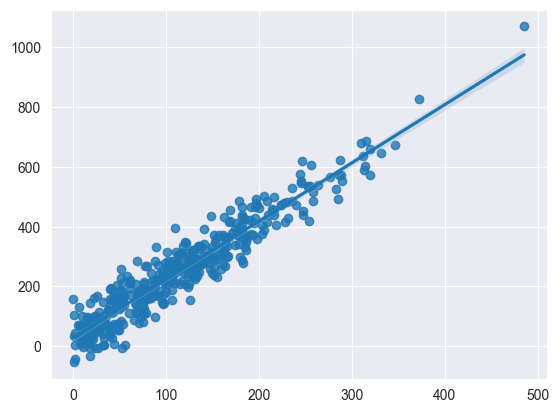

In [10]:
sns.regplot (x = minutes_month, y = cost_per_month)

part B

In [40]:
costs = {x: cost_function(x) for x in minutes_month
                          if x <= 300}

costs



{149.67141530112326: 256.061960392739,
 86.17356988288154: 148.64104745494467,
 164.76885381006923: 389.7091034595039,
 252.30298564080255: 464.23748217005686,
 76.58466252766641: 98.27571833059093,
 76.58630430508194: 146.67135963346917,
 257.92128155073914: 577.4403382269705,
 176.74347291529088: 368.6408554307373,
 53.052561406504786: 107.87606890722867,
 154.25600435859647: 335.7299485929733,
 53.65823071875377: 45.031089794524945,
 53.42702464297432: 156.58933197470026,
 124.19622715660341: 292.56420588338904,
 91.32802446577978: 187.19062522677348,
 72.49178325130327: 220.27979209242739,
 43.77124707590273: 56.16768920415352,
 1.2831120334423787: 83.96167372956322,
 131.4247332595274: 295.5741497988173,
 9.197592447878904: 26.567555401849138,
 41.230370133529135: 106.46705849864269,
 246.5648768921554: 512.7665154937638,
 77.42236995134644: 240.85888472357874,
 106.75282046879238: 184.67168456403408,
 42.47481862134569: 71.82367528536147,
 45.56172754748174: 167.93859969858747,
 

In [43]:
df = pd.DataFrame(columns = ['Minutes', 'Cost per month'])
df['Minutes'] = costs.keys()
df["Cost per month"] = costs.values()
df.head()



,Minutes,Cost per month
0,149.671415,256.061960
1,86.173570,148.641047
2,164.768854,389.709103
3,252.302986,464.237482
4,76.584663,98.275718


In [45]:
for x in df.index:
    if df.loc[x, 'Cost per month'] < 0:
        df.drop(x, inplace = True)

df.describe()

,Minutes,Cost per month
count,378.000000,378.000000
mean,111.331999,247.928350
std,70.499864,147.128804
min,0.252936,3.279850
25%,51.468915,117.418689
50%,106.804559,235.039166
75%,161.772790,347.154125
max,289.679298,655.525821


In [49]:
x = np.linspace(0, 300)
f = lambda x: 2*x + 25
ground_truth = [f(x) for x in x]

<Axes: xlabel='Minutes', ylabel='Cost per month'>

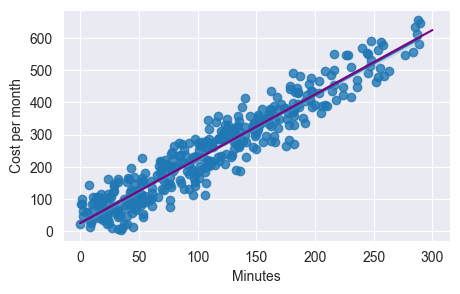

In [50]:
fig, ax = plt.figure(figsize = (5,3), dpi = 100), plt.axes()
sns.regplot(df, x= 'Minutes', y = 'Cost per month')
sns.lineplot (x = x, y = ground_truth, color = "purple")